<h1>Задание 1<h1>

Написать программу (Python, С# или любой другой язык программирования) для построения частотного словаря текста на русском языке без учета стоп-слов. Входной текст хранится в текстовом файле, построенный словарь также должен быть сохранен в текстовый файл в формате (словоформа, количество_вхождений_словоформы) с сортировкой по количеству вхождений. Для деления текста на токены и удаления стоп-слов использовать библиотеку nltk, а для нормализации использовать библиотеку Pymorphy2. (2 балл)

<h2>Импорт библиотек<h2>

In [325]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
#from pymystem3 import Mystem
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

#Create and stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'какой-то', 'который'])

#mystem = Mystem() 

In [326]:
punctuation = punctuation + '...' + '—' + '«' + '»' + '„' + '“' + '№'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...—«»„“№'

<h2>Определение функций<h2>

In [346]:
def get_text(file_name):
    txt = ''
    with open(file_name) as f:
        for line in f:
            line = line.rstrip("\r\n")
            line = line.rstrip(".—")
            txt += line + ' '
    return(txt)

In [347]:
def get_sentences(text):
    split_regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda t: t, [t.strip() for t in split_regex.split(text)])
    corpus = []
    for s in sentences:
        corpus.append(s)
    return(corpus)

In [348]:
#Preprocess function
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [ morph.parse(word.lower())[0].normal_form for word in tokens if (word != " ") and (word not in punctuation)]
    filtered_tokens = []
    for word in lemmatized_tokens:
        if (word not in russian_stopwords) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

<h2>Начало работы</h2>

In [349]:
txt = get_text('text.txt')
txt = get_sentences(txt)
txt = ' '.join(txt)

In [350]:
txt = preprocess_text(txt)

In [351]:
from nltk import FreqDist

In [352]:
frequency_distribution = FreqDist(txt)
print(frequency_distribution)

<FreqDist with 3530 samples and 8359 outcomes>


In [353]:
frequency_distribution

FreqDist({'вера': 95, 'сказать': 73, 'всё': 61, 'знать': 58, 'свой': 55, 'весь': 47, 'николаевич': 44, 'рука': 43, 'любовь': 43, 'говорить': 43, ...})

In [363]:
#for key in frequency_distribution:
    #print(key, frequency_distribution[key])

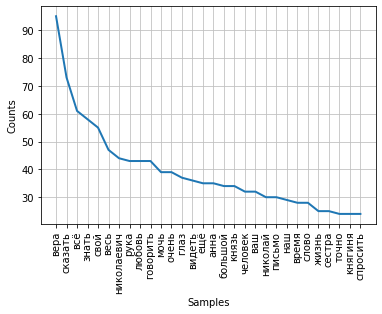

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [355]:
frequency_distribution.plot(30, cumulative=False)

In [356]:
#!pip3 install wordcloud

In [357]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [358]:
%matplotlib inline

In [359]:
text_raw = " ".join(t)

In [360]:
word_cloud = WordCloud().generate(text_raw)

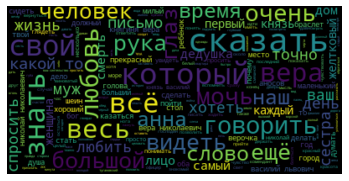

In [361]:
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [362]:
with open('result1.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()